# Disease Prediction

### The data is collected from the source 
http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html

In [5]:
import pandas as pd

In [6]:
import csv
from collections import defaultdict

disease_list = []

def return_list(disease):
    disease_list = []
    match = disease.replace('^','_').split('_')
    count = 1
    for name in match:
        if count%2==0:
            disease_list.append(name)
        count = count + 1
        
    return disease_list  

with open("Unclean_dataset.csv") as csvfile:
    reader = csv.reader(csvfile)
    disease_name=""
    disease_weight = 0
    disease_list = []
    dict_wt = {}
    disease_dict = defaultdict(list)
    for row in reader:
        
        if row[0]!="\xc2\xa0" and row[0]!="":
            disease_name = row[0]
            disease_weight = row[1]
            disease_list = return_list(disease_name)
            
            
        if row[2]!="\xc2\xa0" and row[2]!="":
            symptom_list = return_list(row[2])
            
            for name in disease_list:
                for symptom in symptom_list:
                    disease_dict[name].append(symptom)
                dict_wt[name] = disease_weight
                
# print (dict)                


<type 'dict'>


Now we will write the clean data in a new file "Clean_dataset.csv" on which we will perform our further calculation 

In [7]:
with open("Clean_dataset.csv","w") as csvfile:  
    writer = csv.writer(csvfile)
    for key,values in disease_dict.items():
        for symptoms in values:
            #Here ascii encoding is done for the key
            #str.encoding may give error.
            key = key.encode('ascii').decode('utf-8')
            writer.writerow([key,symptoms,dict_wt[key]])

In [8]:
columns = ['Source','Target','Weight']

In [9]:
data = pd.read_csv("Clean_dataset.csv",names=columns,encoding="ISO-8859-1")

In [10]:
data.head()

Source          Target  Weight
0  influenza  uncoordination      68
1  influenza           fever      68
2  influenza  pleuritic pain      68
3  influenza         snuffle      68
4  influenza     throat sore      68

In [11]:
# "to_csv" method is used for storing dataframe in 
# to a csv file. As we don't need to store the 
# preceding indices of each row in the file
# we can avoid that by passing a False boolean 
# value to index parameter.
# Now data will store like this
# influenza,uncoordination,68 
# not like this
# 0,influenza,uncoordination,68 
data.to_csv("Clean_dataset.csv",index=False)

In [12]:
data.head()

Source          Target  Weight
0  influenza  uncoordination      68
1  influenza           fever      68
2  influenza  pleuritic pain      68
3  influenza         snuffle      68
4  influenza     throat sore      68

Now we will make one another file "nodetable.csv" which contains the mapping of symptoms
to symptoms and the diseases to diseases. Here in the below code I have used two array slist
and dlist which is basically symptom list and disease list.
As the file should contain unique symptoms so, whenever any new symptom come we will store it in 
slist so that their duplicates may not store in the file again.
Similarly dlist work to store all the unique diseases. 

In [13]:
slist = []
dlist = []
with open("nodetable.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    
    for key,values in disease_dict.items():
        for v in values:
            if v not in slist:
                writer.writerow([v,v,"symptom"])
                slist.append(v)
        if key not in dlist:
            writer.writerow([key,key,"disease"])
            dlist.append(key)


In [14]:
nt_columns = ['Id','Label','Attribute']

In [15]:
nt_data = pd.read_csv("nodetable.csv",names=nt_columns,encoding="ISO-8859-1",)

In [16]:
nt_data.head()

Id           Label Attribute
0  uncoordination  uncoordination   symptom
1           fever           fever   symptom
2  pleuritic pain  pleuritic pain   symptom
3         snuffle         snuffle   symptom
4     throat sore     throat sore   symptom

In [17]:
nt_data.to_csv("nodetable.csv",index=False)

## Analysing the Cleaned Data

In [18]:
data = pd.read_csv("Clean_dataset.csv",encoding="ISO-8859-1")

In [19]:
data.head()

Source          Target  Weight
0  influenza  uncoordination      68
1  influenza           fever      68
2  influenza  pleuritic pain      68
3  influenza         snuffle      68
4  influenza     throat sore      68

In [20]:
len(data['Source'].unique())

148

In [21]:
len(data['Target'].unique())

405

In [22]:
df = pd.DataFrame(data)

In [23]:
Unique_df = pd.get_dummies(df.Target)
## The get_dummies method is used here 
# to convert the 'Target' i.e. symptoms in the form
# of table like this
# Let me tell you by example :
# s = pd.Series(list('abca'))
# pd.get_dummies(s)
# Output :
#    a  b  c
# 0  1  0  0
# 1  0  1  0
# 2  0  0  1
# 3  1  0  0
# for more details check here
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

In [24]:
Unique_df.head()

Heberden's node  Murphy's sign  Stahli's line  abdomen acute  \
0              0.0            0.0            0.0            0.0   
1              0.0            0.0            0.0            0.0   
2              0.0            0.0            0.0            0.0   
3              0.0            0.0            0.0            0.0   
4              0.0            0.0            0.0            0.0   

   abdominal bloating  abdominal tenderness  abnormal sensation  \
0                 0.0                   0.0                 0.0   
1                 0.0                   0.0                 0.0   
2                 0.0                   0.0                 0.0   
3                 0.0                   0.0                 0.0   
4                 0.0                   0.0                 0.0   

   abnormally hard consistency  abortion  abscess bacterial      ...        \
0                          0.0       0.0                0.0      ...         
1                          0.0       0.0                0.0      ...         
2                          0.0       0.0                0.0      ...         
3                          0.0       0.0                0.0      ...         
4                          0.0       0.0                0.0      ...         

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0             0.0       0.0        0.0          0.0   0.0               0.0   
1             0.0       0.0        0.0          0.0   0.0               0.0   
2             0.0       0.0        0.0          0.0   0.0               0.0   
3             0.0       0.0        0.0          0.0   0.0               0.0   
4             0.0       0.0        0.0          0.0   0.0               0.0   

   wheezing  withdraw  worry  yellow sputum  
0       0.0       0.0    0.0            0.0  
1       0.0       0.0    0.0            0.0  
2       0.0       0.0    0.0            0.0  
3       0.0       0.0    0.0            0.0  
4       0.0       0.0    0.0            0.0  

[5 rows x 404 columns]

In [25]:
df.head()

Source          Target  Weight
0  influenza  uncoordination      68
1  influenza           fever      68
2  influenza  pleuritic pain      68
3  influenza         snuffle      68
4  influenza     throat sore      68

In [26]:
df_source = df['Source']

In [27]:
df_source.head()

0    influenza
1    influenza
2    influenza
3    influenza
4    influenza
Name: Source, dtype: object

Now we will concat the above two table formed i.e df_source and Unique_df

In [28]:
df_final = pd.concat([df_source,Unique_df],axis=1)

In [29]:
df_final.head()

Source  Heberden's node  Murphy's sign  Stahli's line  abdomen acute  \
0  influenza              0.0            0.0            0.0            0.0   
1  influenza              0.0            0.0            0.0            0.0   
2  influenza              0.0            0.0            0.0            0.0   
3  influenza              0.0            0.0            0.0            0.0   
4  influenza              0.0            0.0            0.0            0.0   

   abdominal bloating  abdominal tenderness  abnormal sensation  \
0                 0.0                   0.0                 0.0   
1                 0.0                   0.0                 0.0   
2                 0.0                   0.0                 0.0   
3                 0.0                   0.0                 0.0   
4                 0.0                   0.0                 0.0   

   abnormally hard consistency  abortion      ...        vision blurred  \
0                          0.0       0.0      ...                   0.0   
1                          0.0       0.0      ...                   0.0   
2                          0.0       0.0      ...                   0.0   
3                          0.0       0.0      ...                   0.0   
4                          0.0       0.0      ...                   0.0   

   vomiting  weepiness  weight gain  welt  wheelchair bound  wheezing  \
0       0.0        0.0          0.0   0.0               0.0       0.0   
1       0.0        0.0          0.0   0.0               0.0       0.0   
2       0.0        0.0          0.0   0.0               0.0       0.0   
3       0.0        0.0          0.0   0.0               0.0       0.0   
4       0.0        0.0          0.0   0.0               0.0       0.0   

   withdraw  worry  yellow sputum  
0       0.0    0.0            0.0  
1       0.0    0.0            0.0  
2       0.0    0.0            0.0  
3       0.0    0.0            0.0  
4       0.0    0.0            0.0  

[5 rows x 405 columns]

In [30]:
df_final.drop_duplicates(keep='first',inplace=True)

In [31]:
df_final.head()

Source  Heberden's node  Murphy's sign  Stahli's line  abdomen acute  \
0  influenza              0.0            0.0            0.0            0.0   
1  influenza              0.0            0.0            0.0            0.0   
2  influenza              0.0            0.0            0.0            0.0   
3  influenza              0.0            0.0            0.0            0.0   
4  influenza              0.0            0.0            0.0            0.0   

   abdominal bloating  abdominal tenderness  abnormal sensation  \
0                 0.0                   0.0                 0.0   
1                 0.0                   0.0                 0.0   
2                 0.0                   0.0                 0.0   
3                 0.0                   0.0                 0.0   
4                 0.0                   0.0                 0.0   

   abnormally hard consistency  abortion      ...        vision blurred  \
0                          0.0       0.0      ...                   0.0   
1                          0.0       0.0      ...                   0.0   
2                          0.0       0.0      ...                   0.0   
3                          0.0       0.0      ...                   0.0   
4                          0.0       0.0      ...                   0.0   

   vomiting  weepiness  weight gain  welt  wheelchair bound  wheezing  \
0       0.0        0.0          0.0   0.0               0.0       0.0   
1       0.0        0.0          0.0   0.0               0.0       0.0   
2       0.0        0.0          0.0   0.0               0.0       0.0   
3       0.0        0.0          0.0   0.0               0.0       0.0   
4       0.0        0.0          0.0   0.0               0.0       0.0   

   withdraw  worry  yellow sputum  
0       0.0    0.0            0.0  
1       0.0    0.0            0.0  
2       0.0    0.0            0.0  
3       0.0    0.0            0.0  
4       0.0    0.0            0.0  

[5 rows x 405 columns]

In [32]:
len(df_final)

2113

In [33]:
cols = df_final.columns

In [34]:
cols = cols[1:]

In [35]:
df_final = df_final.groupby('Source').sum()
df_final = df_final.reset_index()
df_final[:5]

Source  Heberden's node  Murphy's sign  \
0                  Alzheimer's disease              0.0            0.0   
1                                  HIV              0.0            0.0   
2       Pneumocystis carinii pneumonia              0.0            0.0   
3             accident cerebrovascular              0.0            0.0   
4  acquired immuno-deficiency syndrome              0.0            0.0   

   Stahli's line  abdomen acute  abdominal bloating  abdominal tenderness  \
0            0.0            0.0                 0.0                   0.0   
1            0.0            0.0                 0.0                   0.0   
2            0.0            0.0                 0.0                   0.0   
3            0.0            0.0                 0.0                   0.0   
4            0.0            0.0                 0.0                   0.0   

   abnormal sensation  abnormally hard consistency  abortion      ...        \
0                 0.0                          0.0       0.0      ...         
1                 0.0                          0.0       0.0      ...         
2                 0.0                          0.0       0.0      ...         
3                 0.0                          0.0       0.0      ...         
4                 0.0                          0.0       0.0      ...         

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0             0.0       0.0        0.0          0.0   0.0               1.0   
1             0.0       0.0        0.0          0.0   0.0               0.0   
2             0.0       0.0        0.0          0.0   0.0               0.0   
3             0.0       0.0        0.0          0.0   0.0               0.0   
4             0.0       0.0        0.0          0.0   0.0               0.0   

   wheezing  withdraw  worry  yellow sputum  
0       0.0       0.0    0.0            0.0  
1       0.0       0.0    0.0            0.0  
2       0.0       0.0    0.0            1.0  
3       0.0       0.0    0.0            0.0  
4       0.0       0.0    0.0            0.0  

[5 rows x 405 columns]

In [36]:
len(df_final)

148

In [37]:
df_final.to_csv("df_final.csv")

In [38]:
x = df_final[cols]
y = df_final['Source']

In [39]:
df_final.head()

Source  Heberden's node  Murphy's sign  \
0                  Alzheimer's disease              0.0            0.0   
1                                  HIV              0.0            0.0   
2       Pneumocystis carinii pneumonia              0.0            0.0   
3             accident cerebrovascular              0.0            0.0   
4  acquired immuno-deficiency syndrome              0.0            0.0   

   Stahli's line  abdomen acute  abdominal bloating  abdominal tenderness  \
0            0.0            0.0                 0.0                   0.0   
1            0.0            0.0                 0.0                   0.0   
2            0.0            0.0                 0.0                   0.0   
3            0.0            0.0                 0.0                   0.0   
4            0.0            0.0                 0.0                   0.0   

   abnormal sensation  abnormally hard consistency  abortion      ...        \
0                 0.0                          0.0       0.0      ...         
1                 0.0                          0.0       0.0      ...         
2                 0.0                          0.0       0.0      ...         
3                 0.0                          0.0       0.0      ...         
4                 0.0                          0.0       0.0      ...         

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0             0.0       0.0        0.0          0.0   0.0               1.0   
1             0.0       0.0        0.0          0.0   0.0               0.0   
2             0.0       0.0        0.0          0.0   0.0               0.0   
3             0.0       0.0        0.0          0.0   0.0               0.0   
4             0.0       0.0        0.0          0.0   0.0               0.0   

   wheezing  withdraw  worry  yellow sputum  
0       0.0       0.0    0.0            0.0  
1       0.0       0.0    0.0            0.0  
2       0.0       0.0    0.0            1.0  
3       0.0       0.0    0.0            0.0  
4       0.0       0.0    0.0            0.0  

[5 rows x 405 columns]

## Classifier to learn diseases from Symptoms

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state = 42)

In [42]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train,y_train)

In [43]:
mnb.score(x_test,y_test)

0.0

## Inferences on train and test split

It can't work on unseen data because it has never seen that disease before. Also, there is only one point for each disease and hence no point for this. So we need to train the model entirely. Then what will we test it on? Missing data? Say given one symptom what is the disease? This is again multilabel classification. We can work symptom on symptom. What exactly is differential diagnosis, we need to replicate that.

In [44]:
mnb_1 = MultinomialNB()
mnb_1 = mnb_1.fit(x,y)
mnb_1.score(x,y)

0.90540540540540537

In [45]:
disease_prediction = mnb_1.predict(x)

In [46]:
disease_real = y.values

In [47]:
for i in range(0,len(disease_real)):
    if disease_prediction[i]!=disease_real[i]:
        print ('Predicted value:{0}       Actual value:{1}'.format(disease_prediction[i],disease_real[i]))
    

Predicted value:HIV       Actual value:acquired immuno-deficiency syndrome
Predicted value:biliary calculus       Actual value:cholelithiasis
Predicted value:coronary arteriosclerosis       Actual value:coronary heart disease
Predicted value:depression mental       Actual value:depressive disorder
Predicted value:HIV       Actual value:hiv infections
Predicted value:carcinoma breast       Actual value:malignant neoplasm of breast
Predicted value:carcinoma of lung       Actual value:malignant neoplasm of lung
Predicted value:carcinoma prostate       Actual value:malignant neoplasm of prostate
Predicted value:carcinoma colon       Actual value:malignant tumor of colon
Predicted value:candidiasis       Actual value:oralcandidiasis
Predicted value:effusion pericardial       Actual value:pericardial effusion body substance
Predicted value:sepsis (invertebrate)       Actual value:septicemia
Predicted value:sepsis (invertebrate)       Actual value:systemic infection
Predicted value:tonic-clon

The above values shows the difference between predicted and real values of the disease item after training  

## Training our Decision Tree for Prediction 

In [48]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [49]:
print 'The Decision Tree'
dt = DecisionTreeClassifier()
clf_dt = dt.fit(x,y)
print 'Accuracy: ',clf_dt.score(x,y)

The Decision Tree
Accuracy:  0.905405405405


In [50]:
from sklearn import tree
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='tree.dot', 
                feature_names=cols)

Running the following command we can get the decision tree image.

dot -Tpng tree.dot -o tree.png

The dot file created above can also be converted into .png file by various method
given here https://stackoverflow.com/questions/5316206/converting-dot-to-png-in-python

In [93]:
from IPython.display import Image
Image(filename='tree.png')

From the above plotted decion tree runny_nose is the attribute symptom having highest gini score of 0.9746. Hence this will play a major role in predicting diseases.

## Manual Data Analysis

Now we will analyse our training with some manual data. Previously, we have manipulated our dataset so that for a given disease we have set of symptoms for which the disease is related. Now, this arrangement of data is collected and stored in the file "Training.csv" 

In [52]:
data = pd.read_csv("Training.csv")

In [53]:
data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

         ...         blackheads  scurring  skin_peeling  silver_like_dusting  \
0        ...                  0         0             0                    0   
1        ...                  0         0             0                    0   
2        ...                  0         0             0                    0   
3        ...                  0         0             0                    0   
4        ...                  0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [54]:
data.columns
# These are the symptoms given in the Training dataset of manula data

Index([u'itching', u'skin_rash', u'nodal_skin_eruptions',
       u'continuous_sneezing', u'shivering', u'chills', u'joint_pain',
       u'stomach_pain', u'acidity', u'ulcers_on_tongue',
       ...
       u'blackheads', u'scurring', u'skin_peeling', u'silver_like_dusting',
       u'small_dents_in_nails', u'inflammatory_nails', u'blister',
       u'red_sore_around_nose', u'yellow_crust_ooze', u'prognosis'],
      dtype='object', length=133)

In [55]:
len(data.columns)

133

In [56]:
len(data['prognosis'].unique())

41

So, in out manual training dataset 41 different diseases are present.

In [57]:
df = pd.DataFrame(data)

In [58]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

         ...         blackheads  scurring  skin_peeling  silver_like_dusting  \
0        ...                  0         0             0                    0   
1        ...                  0         0             0                    0   
2        ...                  0         0             0                    0   
3        ...                  0         0             0                    0   
4        ...                  0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [59]:
len(df)

4920

In [60]:
cols = df.columns

In [61]:
cols = cols[:-1]

In [62]:
cols

Index([u'itching', u'skin_rash', u'nodal_skin_eruptions',
       u'continuous_sneezing', u'shivering', u'chills', u'joint_pain',
       u'stomach_pain', u'acidity', u'ulcers_on_tongue',
       ...
       u'pus_filled_pimples', u'blackheads', u'scurring', u'skin_peeling',
       u'silver_like_dusting', u'small_dents_in_nails', u'inflammatory_nails',
       u'blister', u'red_sore_around_nose', u'yellow_crust_ooze'],
      dtype='object', length=132)

In [63]:
len(cols)

132

We have 132 symptoms in the traning dataset

In [64]:
x = df[cols]
y = df['prognosis']

##  Classification on the Manual Data  

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [67]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)
mnb.score(x_test, y_test)

1.0

In [68]:
# Info about Cross-Validation
# http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/cross_validation.html
from sklearn import cross_validation
print "cross_result====="
scores = cross_validation.cross_val_score(mnb,x_test,y_test, cv=3)
print (scores)
print (scores.mean())

cross_result=====
[ 1.  1.  1.]
1.0


So, till now we have used our testing dataset to actually test our Multinomial Bayes model

In [69]:
test_data = pd.read_csv("Testing.csv")

In [70]:
test_data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

          ...           blackheads  scurring  skin_peeling  \
0         ...                    0         0             0   
1         ...                    0         0             0   
2         ...                    0         0             0   
3         ...                    0         0             0   
4         ...                    0         0             0   

   silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                    0                     0                   0        0   
1                    0                     0                   0        0   
2                    0                     0                   0        0   
3                    0                     0                   0        0   
4                    0                     0                   0        0   

   red_sore_around_nose  yellow_crust_ooze            prognosis  
0                     0                  0     Fungal infection  
1                     0                  0              Allergy  
2                     0                  0                 GERD  
3                     0                  0  Chronic cholestasis  
4                     0                  0        Drug Reaction  

[5 rows x 133 columns]

In [71]:
test_x = test_data[cols]
test_y = test_data['prognosis']

In [72]:
mnb.score(test_x,test_y)

1.0

## Training a Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [74]:
print  ("Decision Tree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x_train,y_train)
print "Acurracy: ", clf_dt.score(x_test,y_test)

Decision Tree
Acurracy:  1.0


In [108]:
from sklearn import cross_validation
print ("cross result========")
scores = cross_validation.cross_val_score(dt, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[ 0.98201439  0.98151571  0.971537  ]
0.978355700677


In [76]:
print "Acurracy on the actual test data: ", clf_dt.score(test_x,test_y)

Acurracy on the actual test data:  1.0


In [94]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='Manual-tree.dot', 
                feature_names=cols)

In [96]:
from IPython.display import Image
Image(filename='Manual-tree.png')

## Important Feature Analysis

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Here in importance variable we are
# storing the importance of the features 
# which is basically the symptoms after
# the DecisionTreeClassifier classification
importances = dt.feature_importances_

# Now these importance are sorted
# in descending order by argsort()
# https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

Feature ranking:


In [80]:
# The features are basically columns
# storing the symptoms of the diseases
features = cols

In [81]:
# Now the indices are in sorted order
# so indices are mapped with features
# so we get the feature name from these
# indices. Also importance are retrieved
# from this name
for f in range(5):
    print("%d Feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1 Feature 88 - loss_of_smell (0.026703)
2 Feature 93 - internal_itching (0.026649)
3 Feature 79 - hip_joint_pain (0.026626)
4 Feature 104 - increased_appetite (0.026390)
5 Feature 128 - inflammatory_nails (0.025712)


Hence, from the above result we can infer that loss_of_smell is the top feature that would play a bigger role in predicting diseases. This can be verified by the exported decision tree. 

In [82]:
export_graphviz(dt, 
                out_file='tree-top5.dot', 
                feature_names=cols,
                max_depth = 5
               )

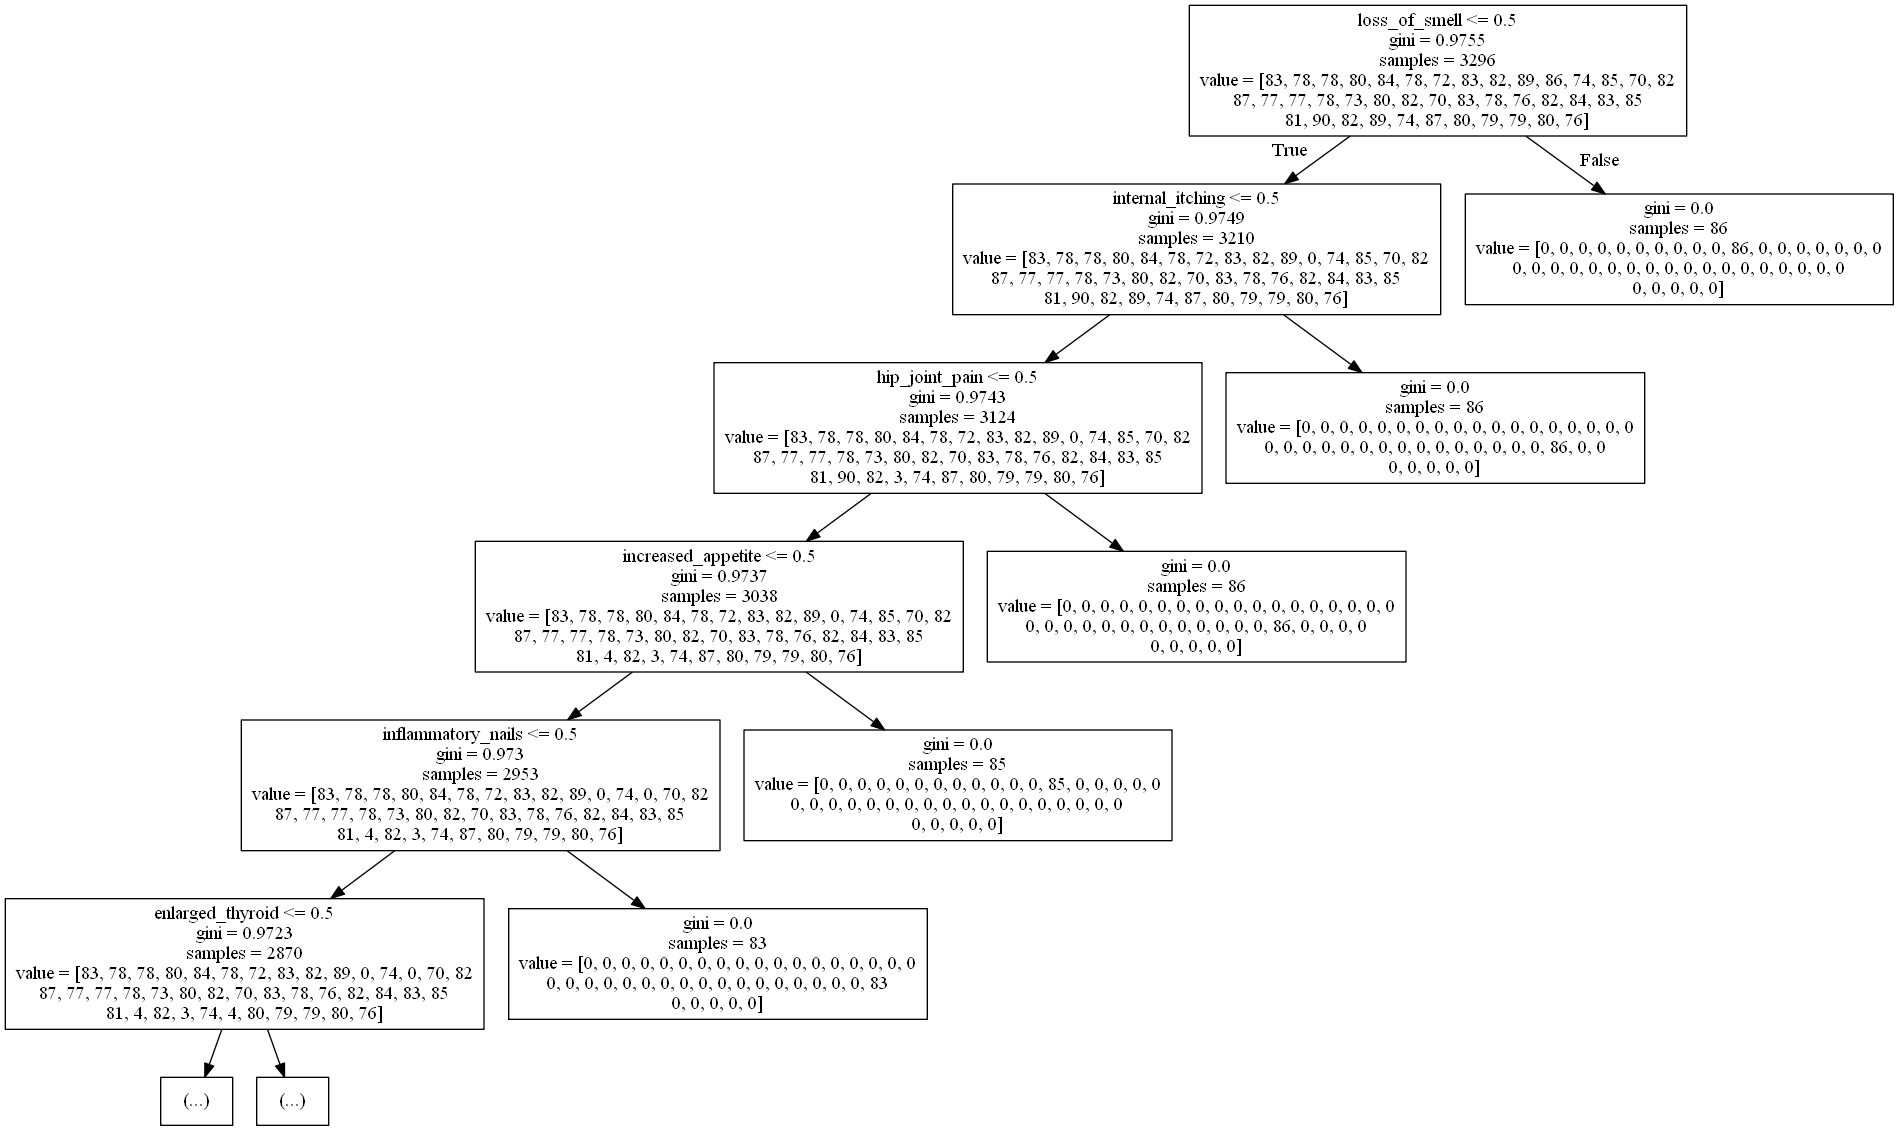

In [91]:
from IPython.display import Image
Image(filename='tree-top5.png')

The loss_of_smell is the top symptom that has the highest Gini impurity score of 0.9755. Then comes internal_itchiness with a score of 0.9749 and so on. Basically this implies that the loss_of_smell symptom has the potential to divide most samples into particular classes and hence is selected as the root of the decision tree. From there we move down with decreasing order of Gini scores.

In [97]:
# Here we have done mapping for
# each symptom to the number
# basically index assigned to it
# and store it in feature_dictionary
feature_dictionary = {}
for i,f in enumerate(features):
    feature_dictionary[f] = i

In [98]:
feature_dictionary['loss_of_smell']

88

In [99]:
sample_x = [i/88 if i ==88 else i*0 for i in range(len(features))]

This means predicting the disease where the only symptom is loss_of_smell.

In [100]:
len(sample_x)

132

In [101]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))

In [102]:
dt.predict(sample_x)

array(['Common Cold'], dtype=object)

In [103]:
dt.predict_proba(sample_x)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]])

Hence it has 100% confidence that the disease would be Common Cold. The prediction would improve once we take more symptoms as input.